<a href="https://colab.research.google.com/github/yahdiarif/Clothing_Sales_Analyst_and_Visualization/blob/main/Clothing_Sales_Analyst_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing


In [ ]:
df = pd.read_excel("Test-Analyst.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_title    219 non-null    object
 1   Cat_product      219 non-null    object
 2   shipping_city    219 non-null    object
 3   Prov             219 non-null    object
 4   referrer_source  219 non-null    object
 5   orders           219 non-null    int64 
 6   gross_sales      219 non-null    int64 
 7   discounts        219 non-null    int64 
 8   returns          219 non-null    int64 
 9   net_sales        219 non-null    int64 
 10  shipping         219 non-null    int64 
 11  total_sales      219 non-null    int64 
 12  net_quantity     219 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 22.4+ KB


In [ ]:
#mengambil nama-nama kolom
nama_kolom = df.columns.tolist()
print(nama_kolom)

['product_title', 'Cat_product', 'shipping_city', 'Prov', 'referrer_source', 'orders', 'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'total_sales', 'net_quantity']


In [ ]:
#cek sample
df.sample(5)

,product_title,Cat_product,shipping_city,Prov,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
199,Talia Dress Woodrose,Dress,Batam,Kepulauan Riau,Social,1,475000000,0,0,475000000,0,475000000,1
89,Klamby Monogram Brooch Rose Gold,Brooch,Kota Padang,Sumatera Barat,Direct,1,385000000,-6581190,0,378418810,0,378418810,1
37,Yasmin Tunic Desert,Tunic,Tangerang,Banten,Search,1,575000000,0,0,575000000,0,575000000,1
207,Yara Pleated Skirt Navy,Skirt,Kota Adm. Jakarta Selatan,DKI Jakarta,Social,1,649000000,0,0,649000000,0,649000000,1
60,Kiara Dress Almond,Dress,Kota Jambi,Jambi,Direct,1,475000000,0,0,475000000,0,475000000,1


# Data Cleansing

In [ ]:
df=df.replace('Unknown', np.nan)

In [ ]:
#mengecek apakah ada kolom yang kosong
df.isna().sum()

product_title      0
Cat_product        0
shipping_city      0
Prov               0
referrer_source    2
orders             0
gross_sales        0
discounts          0
returns            0
net_sales          0
shipping           0
total_sales        0
net_quantity       0
dtype: int64

In [ ]:
#mengatasi Missing value dengan modus
df['referrer_source'].fillna(df['referrer_source'].mode()[0], inplace=True)
df.isna().sum()

product_title      0
Cat_product        0
shipping_city      0
Prov               0
referrer_source    0
orders             0
gross_sales        0
discounts          0
returns            0
net_sales          0
shipping           0
total_sales        0
net_quantity       0
dtype: int64

In [ ]:
#cek duplikat data
duplikat = df.duplicated()
jumlah_duplikat = duplikat.sum()
jumlah_duplikat

0

In [ ]:
#membuat kategori barang
df['Cat Product'] = df['product_title'].str.split().str[1]

In [ ]:
#cek sample
df.sample(5)

,product_title,Cat_product,shipping_city,Prov,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity,Cat Product
90,Kiara Dress Cotton Candy,Dress,Kabupaten Rejang Lebong,Bengkulu,Social,1,475000000,0,0,475000000,0,475000000,1,Dress
44,Sara Outer (Minor) Misty Grey,Outer,Kota Pare Pare,Sulawesi Selatan,Social,1,330000000,0,0,330000000,0,330000000,1,Outer
61,Sheila Dress Lemongrass,Dress,Kab. Karawang,Jawa Barat,Search,1,475000000,0,0,475000000,0,475000000,1,Dress
31,Bali Prayer Mat Midnight Moon,Prayer,Kab. Bogor,Jawa Barat,Social,1,185000000,0,0,185000000,0,185000000,1,Prayer
130,Ruby Wide Pants Ocean Mist,Pants,Kota Adm. Jakarta Selatan,DKI Jakarta,Search,1,525000000,0,0,525000000,0,525000000,1,Wide


# Visualisasi

In [ ]:
nums = ['orders', 'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'total_sales', 'net_quantity']
cats = ['Cat_product', 'Prov', 'referrer_source']

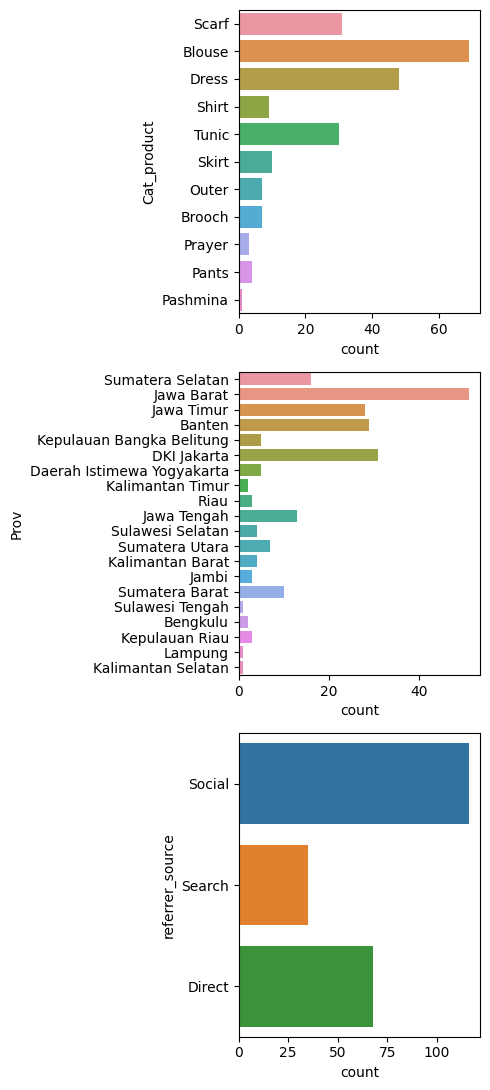

In [ ]:
plt.figure(figsize=(5, 11), dpi=100)
for i in range(len(cats)):
    plt.subplot(len(cats), 1, i + 1)
    sns.countplot(y=df[cats[i]])
    plt.ylabel(cats[i])
    plt.tight_layout()
plt.show()


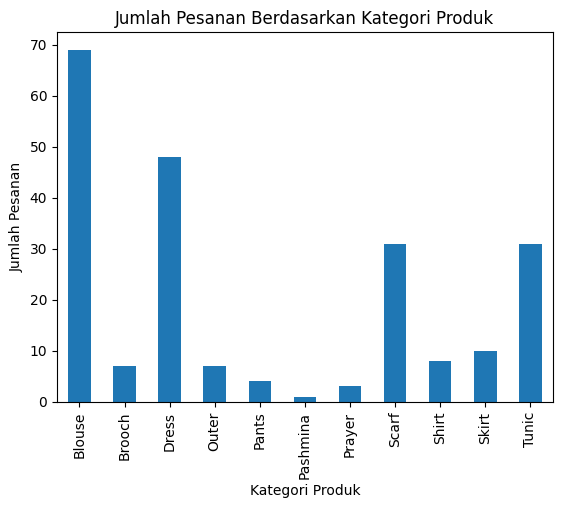

In [ ]:
category_orders = df.groupby('Cat_product')['orders'].sum()
category_orders.plot(kind='bar', xlabel='Kategori Produk', ylabel='Jumlah Pesanan', title='Jumlah Pesanan Berdasarkan Kategori Produk')
plt.show()

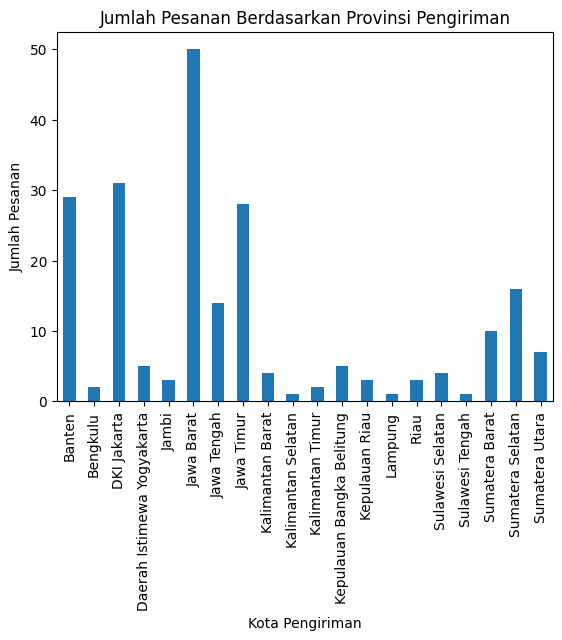

In [ ]:
city_orders = df.groupby('Prov')['orders'].sum()
city_orders.plot(kind='bar', xlabel='Kota Pengiriman', ylabel='Jumlah Pesanan', title='Jumlah Pesanan Berdasarkan Provinsi Pengiriman')
plt.show()

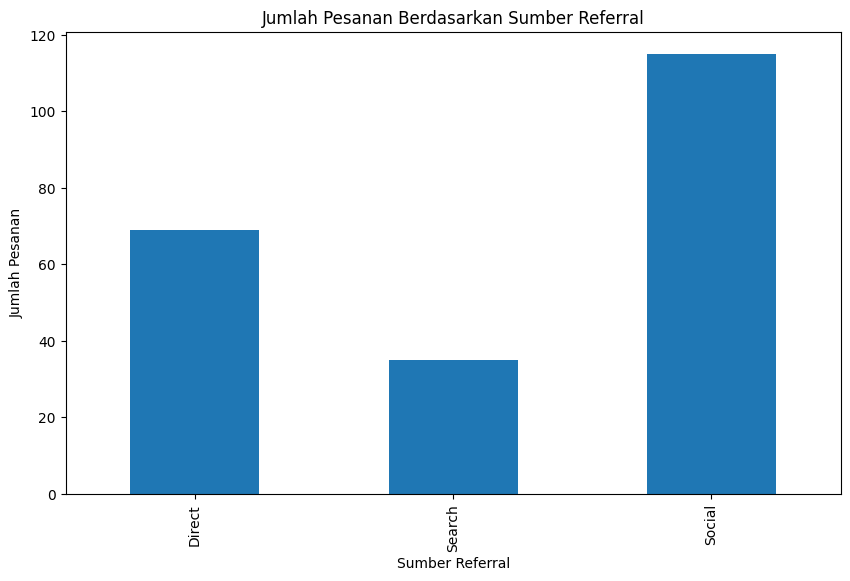

In [ ]:
plt.figure(figsize=(10, 6))
referral_orders = df.groupby('referrer_source')['orders'].sum()
referral_orders.plot(kind='bar')
plt.xlabel('Sumber Referral')
plt.ylabel('Jumlah Pesanan')
plt.title('Jumlah Pesanan Berdasarkan Sumber Referral')
plt.show()

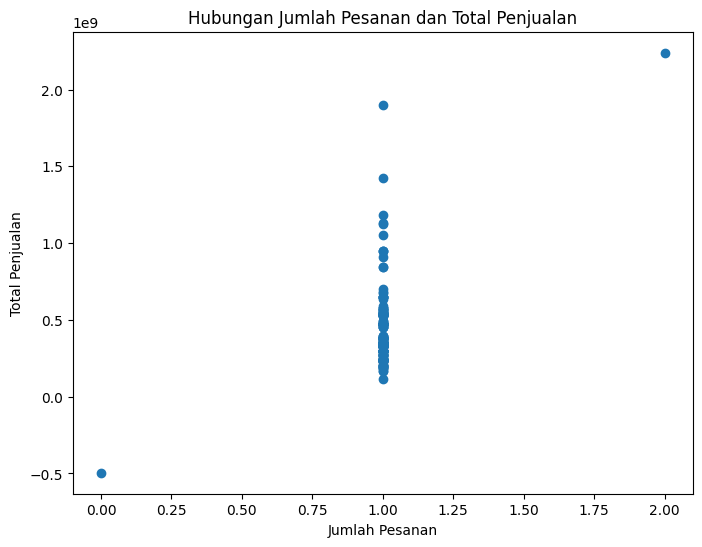

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['orders'], df['total_sales'])
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Total Penjualan')
plt.title('Hubungan Jumlah Pesanan dan Total Penjualan')
plt.show()

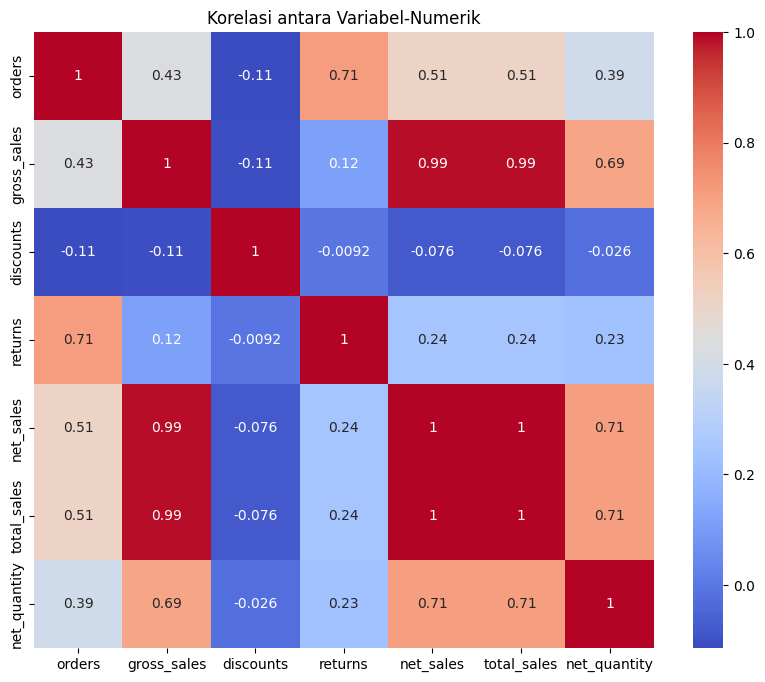

In [ ]:
# Select numeric columns
numeric_cols = ['orders', 'gross_sales', 'discounts', 'returns', 'net_sales', 'total_sales', 'net_quantity']
numeric_data = df[numeric_cols]

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel-Numerik')
plt.show()

<Figure size 1000x600 with 0 Axes>

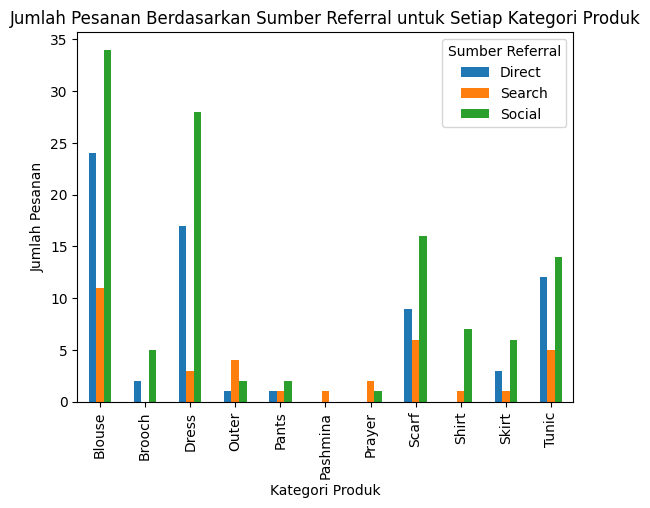

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
data_grouped = df.groupby(['Cat_product', 'referrer_source'])['orders'].sum().unstack()
data_grouped.plot(kind='bar')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pesanan')
plt.title('Jumlah Pesanan Berdasarkan Sumber Referral untuk Setiap Kategori Produk')
plt.legend(title='Sumber Referral')
plt.show()